# Import libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from urllib import urlopen
from matplotlib import rcParams
%matplotlib inline

# Import dataset

In [4]:
fileGit = urlopen('https://raw.githubusercontent.com/msalloum/econ128/master/Homeworks/HW1/bank-data.csv')
df = pd.read_csv(fileGit, sep=',', error_bad_lines=False)

# Helper functions and variables

In [5]:
people = len(df["id"])

def computeDist(column):
    """
    Computes distribution for categorical variables.
    Input: column
    Output: Prints dictionary
    """
    dic = {}
    for person in range(people):
        if df[column][person] not in dic:
            dic[df[column][person]] = 1
        else:
            dic[df[column][person]] += 1

    print "\n%s distribution:" % (column.title())
    print dic

def remove_border(axes=None, top=False, right=False, 
                  left=True, bottom=True):
    #credit: Professor Salloum
    """
    Minimize chartjunk by stripping out unnecesasry plot
    borders and axis ticks
    
    The top/right/left/bottom keywords toggle whether the 
    corresponding plot border is drawn
    """
    ax = axes or plt.gca()
    ax.spines['top'].set_visible(top)
    ax.spines['right'].set_visible(right)
    ax.spines['left'].set_visible(left)
    ax.spines['bottom'].set_visible(bottom)
    
    #turn off all ticks
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    
    #now re-enable visibles
    if top:
        ax.xaxis.tick_top()
    if bottom:
        ax.xaxis.tick_bottom()
    if left:
        ax.yaxis.tick_left()
    if right:
        ax.yaxis.tick_right()

# 1. Data Exploration
Explore the general characteristics of the data as a whole: examine the means, standard deviations, and other statistics associated with the numerical attributes; show the distributions
of values associated with categorical attributes; etc.

In [6]:
#Check out the data
df.head()

,id,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,ID12101,48,FEMALE,INNER_CITY,17546.0,NO,1,NO,NO,NO,NO,YES
1,ID12102,40,MALE,TOWN,30085.1,YES,3,YES,NO,YES,YES,NO
2,ID12103,51,FEMALE,INNER_CITY,16575.4,YES,0,YES,YES,YES,NO,NO
3,ID12104,23,FEMALE,TOWN,20375.4,YES,3,NO,NO,YES,NO,NO
4,ID12105,57,FEMALE,RURAL,50576.3,YES,0,NO,YES,NO,NO,NO


In [7]:
categorical = ["sex", "region", "married", "car", "save_act", "current_act",
              "mortgage", "pep"]
numerical = ["age", "income", "children"]

for var in categorical:
    computeDist(var)
    
for var in numerical:
    print "\n"
    print "%s Summary Statistics:" % (var.title())
    print df[var].describe()



Sex distribution:
{'MALE': 300, 'FEMALE': 300}

Region distribution:
{'TOWN': 173, 'RURAL': 96, 'SUBURBAN': 62, 'INNER_CITY': 269}

Married distribution:
{'YES': 396, 'NO': 204}

Car distribution:
{'YES': 296, 'NO': 304}

Save_Act distribution:
{'YES': 414, 'NO': 186}

Current_Act distribution:
{'YES': 455, 'NO': 145}

Mortgage distribution:
{'YES': 209, 'NO': 391}

Pep distribution:
{'YES': 274, 'NO': 326}


Age Summary Statistics:
count    600.000000
mean      42.395000
std       14.424947
min       18.000000
25%       30.000000
50%       42.000000
75%       55.250000
max       67.000000
Name: age, dtype: float64


Income Summary Statistics:
count      600.000000
mean     27524.031217
std      12899.468246
min       5014.210000
25%      17264.500000
50%      24925.300000
75%      36172.675000
max      63130.100000
Name: income, dtype: float64


Children Summary Statistics:
count    600.000000
mean       1.011667
std        1.056752
min        0.000000
25%        0.000000
50%        

# 2. PEP Comparison
Suppose that because the bank is particularly interested in customers who buy the PEP
(Personal Equity Plan) product. Compare and contrast the subsets of customers who buy
and don’t buy the PEP. Compute summaries (as in part 1) of the selected data with respect
to all other attributes. Can you observe any significant differences between these segments of
customers? Discuss your observations.

In [8]:
#Calculate 1-var stats for varibale PEP:
yes_pep = df["pep"] == "YES"
print yes_pep.describe()
print "\nWe see that %d people have purchased the Personal Equity Plan." % (yes_pep.mean() * yes_pep.count())

count         600
mean     0.456667
std      0.498534
min         False
25%             0
50%             0
75%             1
max          True
Name: pep, dtype: object

We see that 274 people have purchased the Personal Equity Plan.


In [11]:
#Calculate 2-var stats:

pep_groupby = df.groupby('pep')
print pep_groupby.describe().head(20)

print "Analysis:\n"
print "The average person who bought the PEP is probably wealthier than someone without it. \
In terms of income, the average PEP consumer makes about $5000 more. Further, each income percentile \
is higher for PEP consumers. This makes sense considering that those with the PEP tend to be older. The average \
PEP consumer is 45 while the average age of a consumer without is 40. Lastly, individuals with the PEP tend \
to have fewer children. In fact, the 75th percentiles for PEP and no PEP are 1 and 2 children, respectively. \
Families that are less financially independant tend to have more children, and this data may be evidence. "

                  age    children        income
pep                                            
NO  count  326.000000  326.000000    326.000000
    mean    40.098160    1.067485  24900.953374
    std     14.123506    1.195524  11661.123422
    min     18.000000    0.000000   5014.210000
    25%     27.000000    0.000000  15366.475000
    50%     40.000000    0.000000  23105.000000
    75%     51.000000    2.000000  31210.900000
    max     67.000000    3.000000  61554.600000
YES count  274.000000  274.000000    274.000000
    mean    45.127737    0.945255  30644.919453
    std     14.327991    0.860571  13609.613043
    min     18.000000    0.000000   7756.360000
    25%     34.000000    0.000000  19639.475000
    50%     45.000000    1.000000  28080.050000
    75%     58.000000    1.000000  38458.350000
    max     67.000000    3.000000  63130.100000
Analysis:

The average person who bought the PEP is probably wealthier than someone without it. In terms of income, the average PEP cons

# 3. Data Organization
Discretize the age attribute into 3 categories (corresponding to ”young”, ”mid-age”, and
”old”). [Do not change the original age attribute in the table.]

In [12]:
ages = {"young":0, "mid-age":0, "old":0}

for person in range(people):
    if df["age"][person] <= 35:
        ages["young"] += 1
    elif 36 <= df["age"][person] <= 52:
        ages["mid-age"] += 1
    else:
        ages["old"] += 1

print "Number of people 35 or younger: %d" % (ages["young"])
print "Number of people between 36 and 52: %d" % (ages["mid-age"])
print "Number of people 53 or older: %d" % (ages["old"])

Number of people 35 or younger: 209
Number of people between 36 and 52: 222
Number of people 53 or older: 169


# 4. Data Visualization - Scatterplots
Using Matplotlib library and/or ploting capabilties of Pandas, create a scatter plot of the
Income attribute relative to Age. Be sure that your plot contains appropriate labels for the
axes. Do these variables seem correlated?

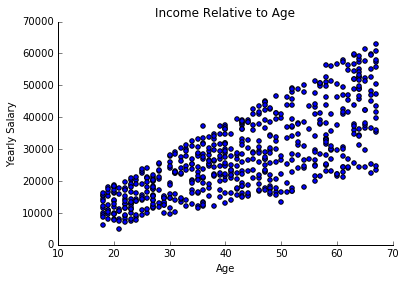

Yes, these variables seem very correlated. As age increases, so does salary. In fact, the correlation 
coefficient between age and income in this sample is 784026447. 
However, it is worth noting that there is typically a normally distributed relationship between age and income.


In [13]:
plt.scatter(df["age"], df["income"])
plt.xlabel("Age")
plt.ylabel("Yearly Salary")
plt.title("Income Relative to Age")
remove_border()
plt.show()

print "Yes, these variables seem very correlated. As age increases, so does salary. In fact, the correlation \
\ncoefficient between age and income in this sample is %d. \
\nHowever, it is worth noting that there is typically a normally distributed relationship between age and income." %\
(np.correlate(df["age"], df["income"]))

# 5. Data Visualization - Histograms
Create histograms for Income (using 9 bins) and Age (using 15 bins).

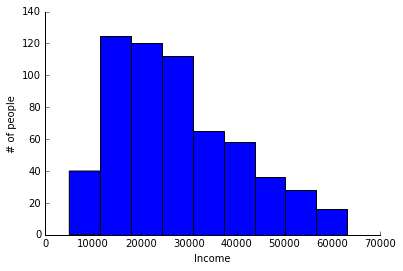

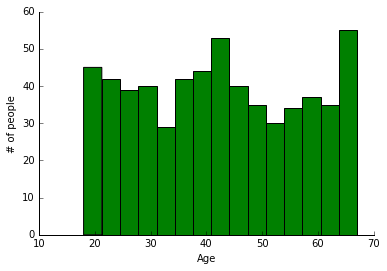

In [14]:
# Create Income histogram
plt.hist(df["income"], bins = 9)
plt.xlabel("Income")
plt.ylabel("# of people")
remove_border()
plt.show()

# Create Age histogram
plt.hist(df["age"], bins = 15, color = 'green')
plt.xlabel("Age")
plt.ylabel("# of people")
remove_border()
#plt.colors
plt.show()